Red Wine Data Set Exploration and Classification Modeling

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set()

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = df['quality']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 365)

Data Exploration

In [5]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1183,6.8,0.660,0.07,1.6,0.070,16.0,61.0,0.99572,3.29,0.60,9.3
1531,6.1,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,3.60,0.66,10.2
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5
439,7.0,0.620,0.18,1.5,0.062,7.0,50.0,0.99510,3.08,0.60,9.3
667,11.3,0.340,0.45,2.0,0.082,6.0,15.0,0.99880,2.94,0.66,9.2


In [6]:
corr_matrix = X_train.corr().abs()

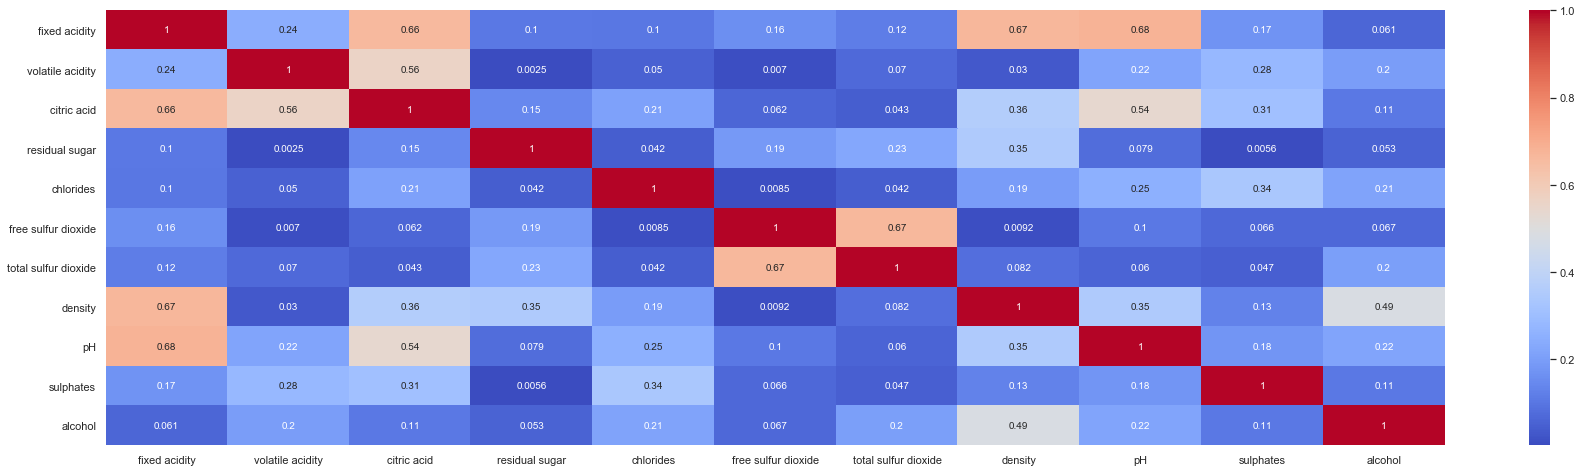

In [7]:
plt.figure(figsize=(30,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

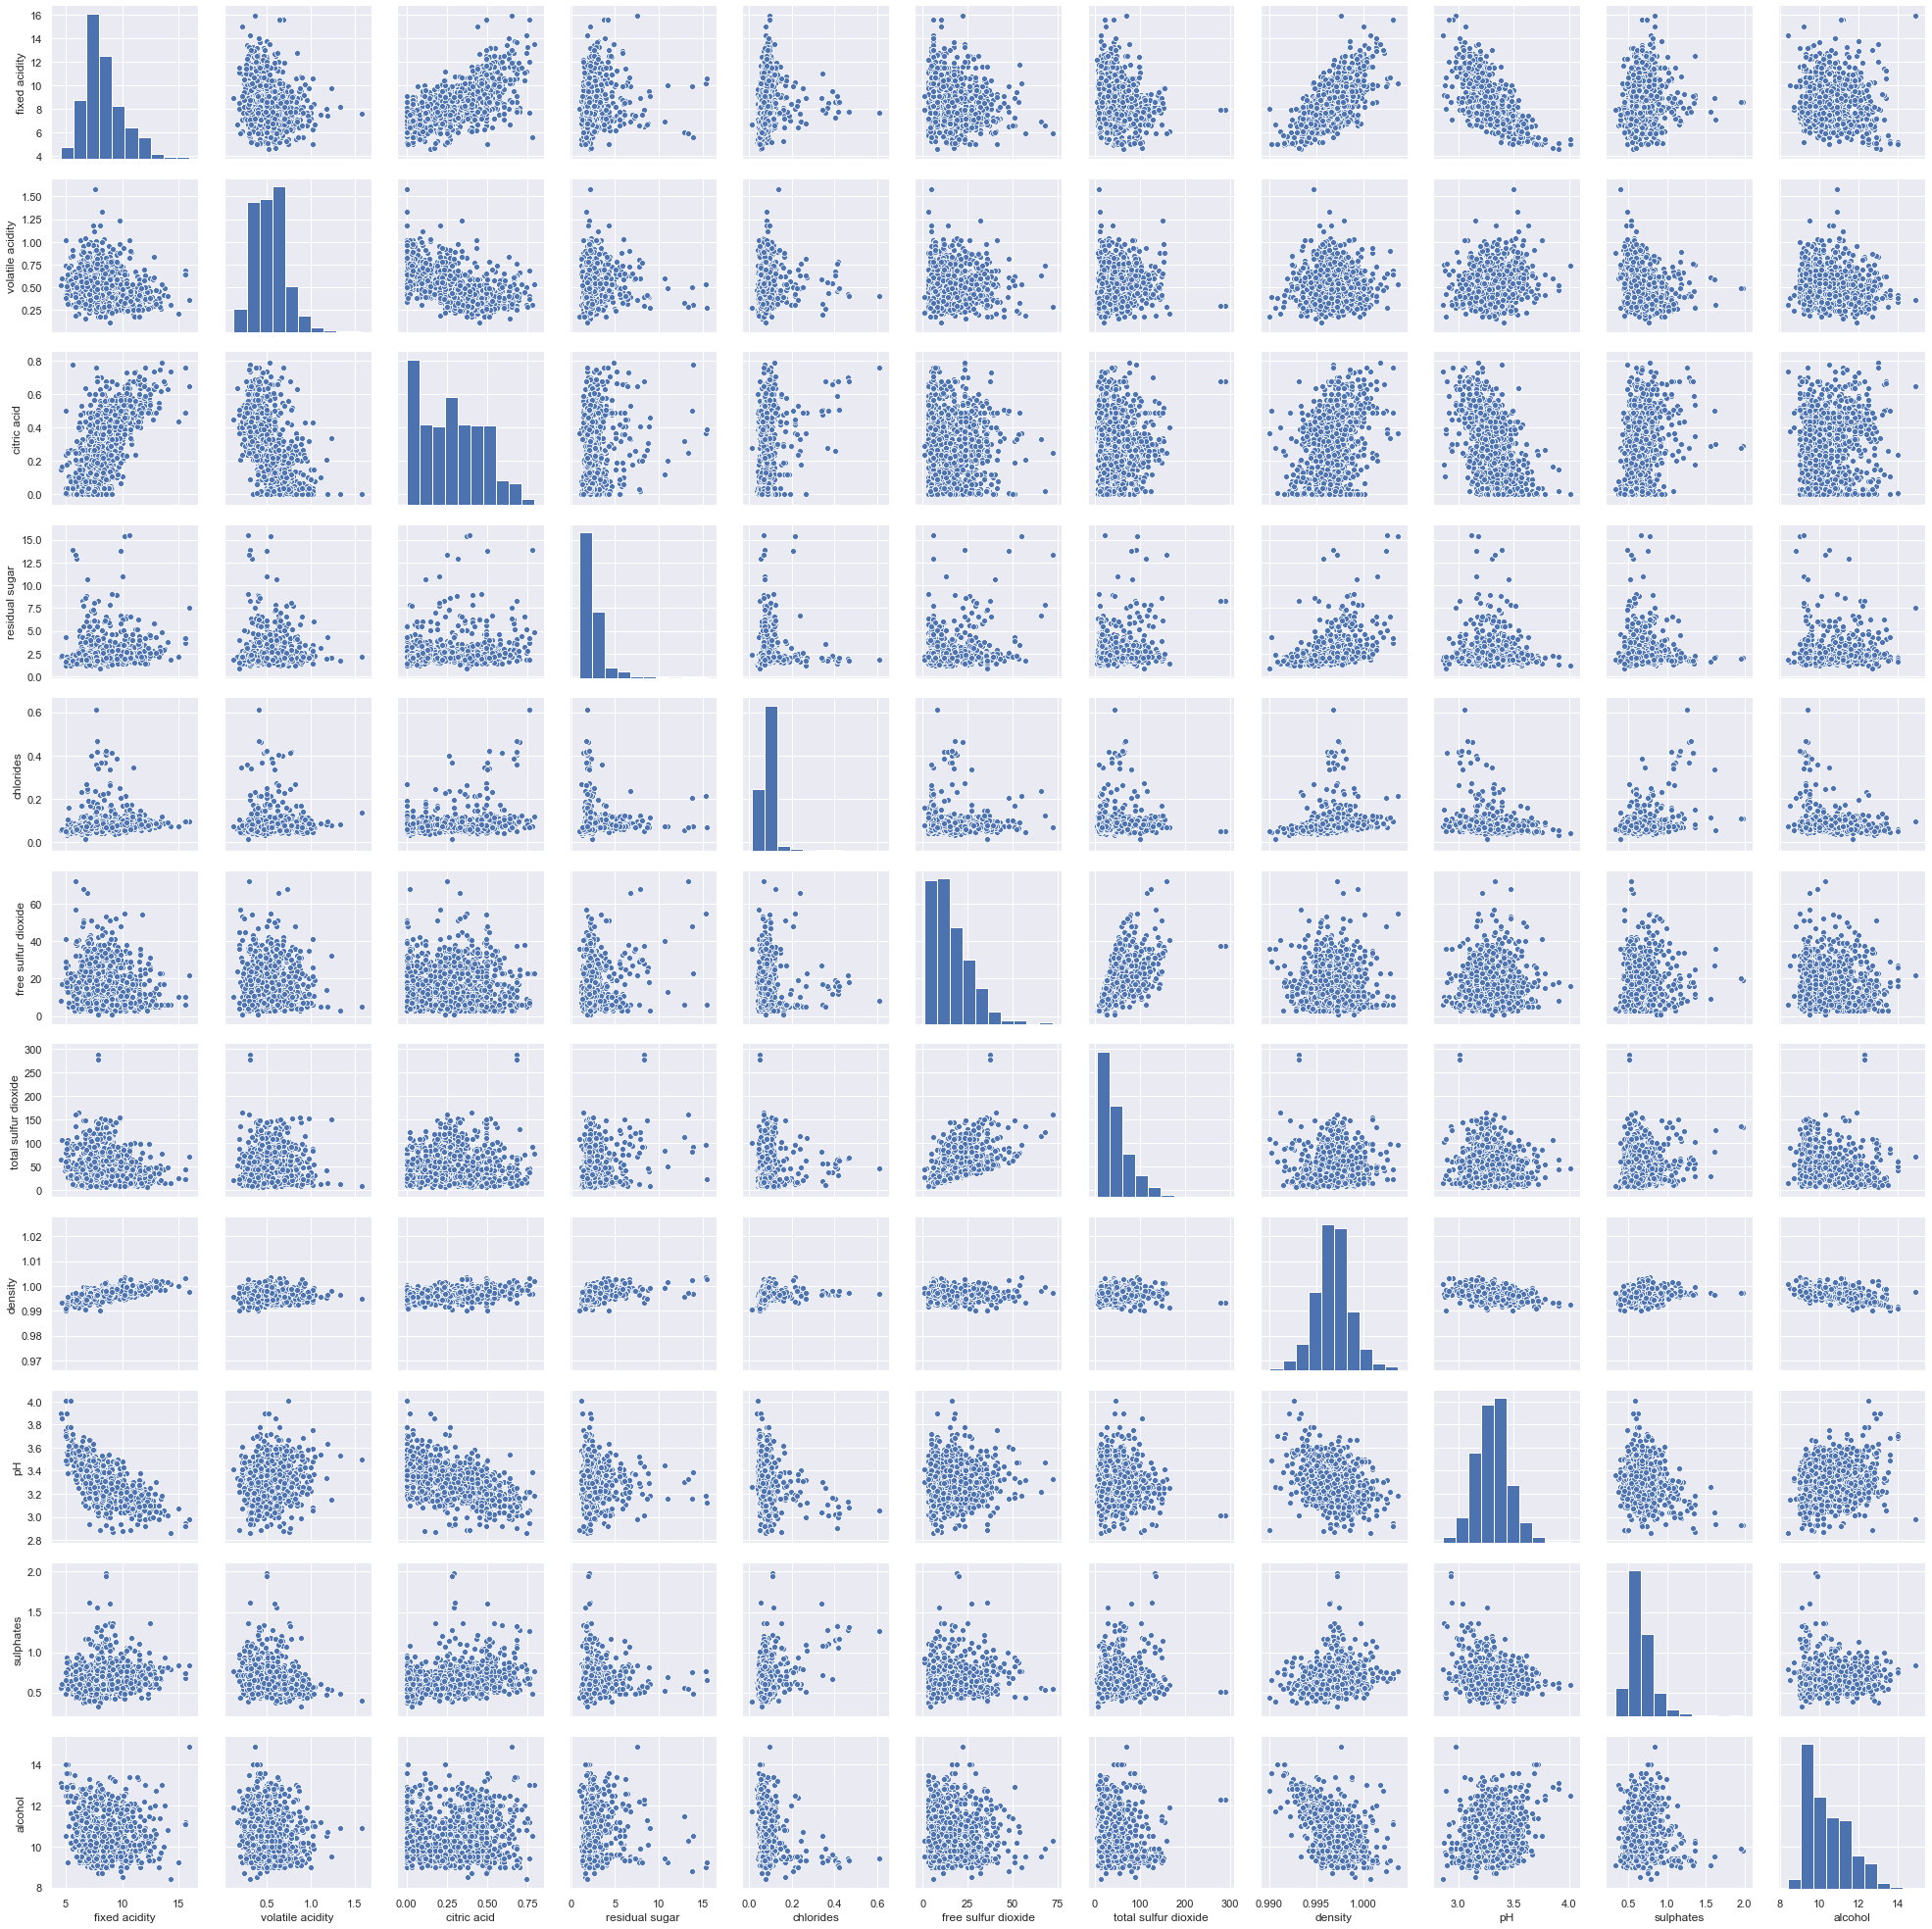

In [8]:
sns.pairplot(X_train)

OLS model fitting with all features

In [9]:
x1 = sm.add_constant(X_train)
results_all_features = sm.OLS(y_train, X_train).fit()

C:\Users\Denys\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
results_all_features.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8799.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:37:21   Log-Likelihood:                         -1261.8
No. Observations:                1279   AIC:                                      2546.
Df Residuals:                    1268   BIC:                                      2602.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0039      0.018     -0.215      0.830      -0.040       0.032
volatile acidity        -1.1062      0.137     -8.097      0.000      -1.374      -0.838
citric acid             -0.1489      0.168     -0.884      0.377      -0.479       0.182
residual sugar           0.0049      0.013      0.370      0.711      -0.021       0.031
chlorides               -1.7158      0.469     -3.658      0.000      -2.636      -0.796
free sulfur dioxide      0.0045      0.002      1.851      0.064      -0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.119      0.000      -0.005      -0.002
density                  4.6270      0.706      6.558      0.000       3.243       6.011
pH                      -0.5447      0.183     -2.984      0.003      -0.903      -0.187
sulphates                0.8794      0.125      7.053      0.000       0.635       1.124
alcohol                  0.3004      0.019     15.514      0.000       0.262       0.338
==============================================================================
Omnibus:                       17.439   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.386
Skew:                          -0.146   Prob(JB):                     5.07e-06
Kurtosis:                       3.610   Cond. No.                     2.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's try to delete one unsagnificant feature from the model: (density, residual sugar, citric acid, fixed acidity), e.g. fixed acidity

In [11]:
X_train_no_fixed_acidity = X_train.copy()
X_train_no_fixed_acidity.drop('fixed acidity', axis = 1, inplace = True)

OLS model without fixed acidity

In [12]:
x2 = sm.add_constant(X_train_no_fixed_acidity)
results_without_fixed_acidity = sm.OLS(y_train, X_train_no_fixed_acidity).fit()
results_without_fixed_acidity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              9686.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:37:21   Log-Likelihood:                         -1261.8
No. Observations:                1279   AIC:                                      2544.
Df Residuals:                    1269   BIC:                                      2595.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -1.1133      0.132     -8.404      0.000      -1.373      -0.853
citric acid             -0.1681      0.143     -1.177      0.239      -0.448       0.112
residual sugar           0.0048      0.013      0.361      0.718      -0.021       0.031
chlorides               -1.6914      0.455     -3.718      0.000      -2.584      -0.799
free sulfur dioxide      0.0045      0.002      1.839      0.066      -0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.245      0.000      -0.005      -0.002
density                  4.5252      0.523      8.660      0.000       3.500       5.550
pH                      -0.5230      0.152     -3.438      0.001      -0.821      -0.225
sulphates                0.8780      0.124      7.054      0.000       0.634       1.122
alcohol                  0.3008      0.019     15.590      0.000       0.263       0.339
==============================================================================
Omnibus:                       17.759   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.959
Skew:                          -0.147   Prob(JB):                     3.80e-06
Kurtosis:                       3.618   Cond. No.                     1.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Deleting also residual sugar & citric acid 

In [13]:
X_train_no_fixed_acidity_resid_sugar_citric_acid = X_train.copy()
X_train_no_fixed_acidity_resid_sugar_citric_acid.drop(['citric acid', 'residual sugar'], axis = 1, inplace = True)

In [14]:
X_train_no_fixed_acidity_resid_sugar_citric_acid.drop('fixed acidity', axis = 1, inplace = True)

In [15]:
x3 = sm.add_constant(X_train_no_fixed_acidity_resid_sugar_citric_acid)
results_without_3_features = sm.OLS(y_train, X_train_no_fixed_acidity_resid_sugar_citric_acid).fit()
results_without_3_features.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.211e+04
Date:                Wed, 10 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:37:21   Log-Likelihood:                         -1262.5
No. Observations:                1279   AIC:                                      2541.
Df Residuals:                    1271   BIC:                                      2582.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -1.0316      0.113     -9.128      0.000      -1.253      -0.810
chlorides               -1.7769      0.448     -3.969      0.000      -2.655      -0.899
free sulfur dioxide      0.0049      0.002      2.027      0.043       0.000       0.010
total sulfur dioxide    -0.0034      0.001     -4.460      0.000      -0.005      -0.002
density                  4.2272      0.448      9.428      0.000       3.348       5.107
pH                      -0.4404      0.132     -3.324      0.001      -0.700      -0.180
sulphates                0.8661      0.124      6.992      0.000       0.623       1.109
alcohol                  0.2970      0.019     15.832      0.000       0.260       0.334
==============================================================================
Omnibus:                       17.931   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.146
Skew:                          -0.150   Prob(JB):                     3.46e-06
Kurtosis:                       3.618   Cond. No.                     1.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Creating Linear Regression Model with sklearn package

In [16]:
reg = LinearRegression()
reg.fit(X_train_no_fixed_acidity_resid_sugar_citric_acid, y_train)

LinearRegression()

In [17]:
reg.coef_

array([-1.02673370e+00, -1.78946128e+00,  4.89943244e-03, -3.42528478e-03,
       -8.03032251e+00, -4.80930811e-01,  8.86535874e-01,  2.87016009e-01])

In [18]:
sum_table = pd.DataFrame(data = X_train_no_fixed_acidity_resid_sugar_citric_acid.columns.values, columns = ['Features'])
sum_table['Coefficients'] = reg.coef_
sum_table

,Features,Coefficients
0,volatile acidity,-1.026734
1,chlorides,-1.789461
2,free sulfur dioxide,0.004899
3,total sulfur dioxide,-0.003425
4,density,-8.030323
5,pH,-0.480931
6,sulphates,0.886536
7,alcohol,0.287016


In [19]:
X_test_without_3_features = X_test.copy()
X_test_without_3_features.drop(['citric acid', 'residual sugar', 'fixed acidity'], axis = 1, inplace = True)

In [20]:
pred = reg.predict(X_test_without_3_features)

In [21]:
comparison = pd.DataFrame()
comparison['predicted_values'] = pred
comparison['predicted_values'] = comparison['predicted_values'].apply(np.round)

In [22]:
y_test_for_comparison = y_test.copy()
y_test_for_comparison = y_test_for_comparison.reset_index(drop=True)
comparison['real_values'] = y_test_for_comparison

In [23]:
comparison['Residual'] = comparison['real_values'] - comparison['predicted_values']
comparison['Difference'] = np.absolute(comparison['Residual']/comparison['real_values']*100)

In [24]:
comparison.describe()

,predicted_values,real_values,Residual,Difference
count,320.000000,320.000000,320.000000,320.000000
mean,5.587500,5.584375,-0.003125,7.410714
std,0.591343,0.791257,0.669527,11.091593
min,4.000000,3.000000,-2.000000,0.000000
25%,5.000000,5.000000,0.000000,0.000000
50%,6.000000,6.000000,0.000000,0.000000
75%,6.000000,6.000000,0.000000,16.666667
max,7.000000,8.000000,2.000000,66.666667


In [25]:
rms1 = sqrt(mean_squared_error(comparison['real_values'], comparison['predicted_values']))
print(rms1)

0.6684870978560469


DECISION TREES AND RANDOM FOREST MODELS (looking for the best accuracy score)

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
predictions = dtree.predict(X_test)

In [29]:
confusion_matrix0 = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix0)

Predicted  4   5   6   7
Actual                  
3          0   2   0   0
4          4   4   2   2
5          7  92  40   4
6          3  27  80  16
7          0   1   9  24
8          0   0   2   1


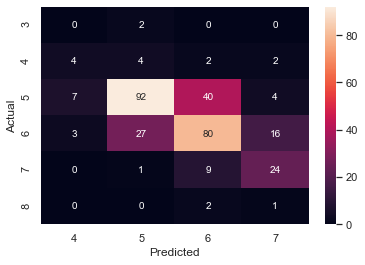

In [30]:
sns.heatmap(confusion_matrix0, annot=True)
plt.show()

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.29      0.33      0.31        12
           5       0.73      0.64      0.68       143
           6       0.60      0.63      0.62       126
           7       0.51      0.71      0.59        34
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.35      0.39      0.37       320
weighted avg       0.63      0.62      0.62       320



C:\Users\Denys\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
accuracy_score(y_test, predictions)

0.625

In [119]:
ab_classifier = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 400)
ab_classifier.fit(X_train, y_train)

In [120]:
predictions_ada = ab_classifier.predict(X_test)

In [121]:
confusion_matrix_ada = pd.crosstab(y_test, predictions_ada, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_ada)

Predicted  4   5   6   7  8
Actual                     
3          0   2   0   0  0
4          3   4   3   2  0
5          7  98  35   3  0
6          3  29  77  17  0
7          0   2   8  23  1
8          0   0   2   1  0


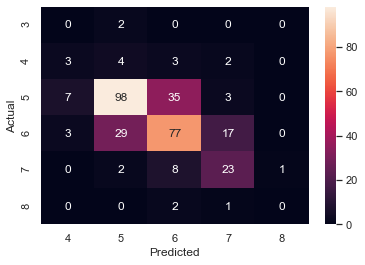

In [123]:
sns.heatmap(confusion_matrix_ada, annot=True)
plt.show()

In [124]:
accuracy_score(y_test, predictions_ada)

0.628125

In [127]:
ab_classifier_clean = AdaBoostClassifier(RandomForestClassifier(n_estimators=20), n_estimators = 10000)
ab_classifier_clean.fit(X_train, y_train)
predictions_ada_clean = ab_classifier_clean.predict(X_test)
accuracy_score(y_test, predictions_ada_clean)

0.721875

Random FOrest Model

In [33]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [35]:
confusion_matrix1 = pd.crosstab(y_test, rfc_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix1)

Predicted  4    5   6   7
Actual                   
3          0    1   1   0
4          0    5   6   1
5          2  115  25   1
6          1   29  91   5
7          0    3   9  22
8          0    0   2   1


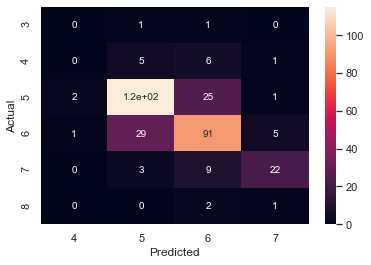

In [36]:
sns.heatmap(confusion_matrix1, annot=True)
plt.show()

In [37]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.75      0.80      0.78       143
           6       0.68      0.72      0.70       126
           7       0.73      0.65      0.69        34
           8       0.00      0.00      0.00         3

    accuracy                           0.71       320
   macro avg       0.36      0.36      0.36       320
weighted avg       0.68      0.71      0.70       320



C:\Users\Denys\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
accuracy_score(y_test, rfc_pred)

0.7125

KNN MODEL 

In [39]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_train_scaled)
    error_rate.append(np.mean(pred_i != y_train))

Text(0, 0.5, 'Error Rate')

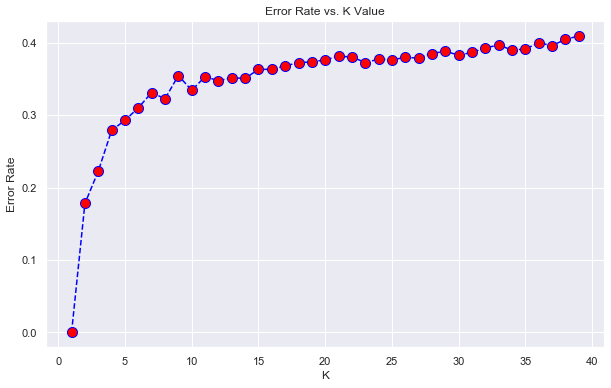

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)

In [43]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
pred1 = knn.predict(X_test_scaled)

In [45]:
confusion_matrix2 = pd.crosstab(y_test, pred1, rownames=['Actual'], colnames=['Predicted'])

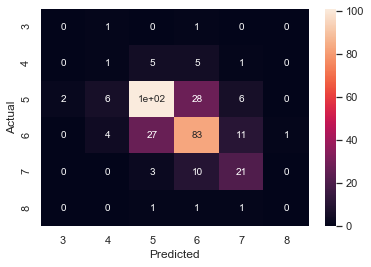

In [46]:
sns.heatmap(confusion_matrix2, annot=True)
plt.show()

In [47]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.08      0.08      0.08        12
           5       0.74      0.71      0.72       143
           6       0.65      0.66      0.65       126
           7       0.53      0.62      0.57        34
           8       0.00      0.00      0.00         3

    accuracy                           0.64       320
   macro avg       0.33      0.34      0.34       320
weighted avg       0.64      0.64      0.64       320



In [48]:
accuracy_score(y_test, pred1)

0.64375

SVC MODEL

In [49]:
param_grid = {'C': [0.1,1, 10, 100, 1000, 10000], 'gamma': [1,0.1,0.01,0.001, 0.0001]} 

In [50]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.422, total=   0.2s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.422, total=   0.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.422, total=   0.2s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.418, total=   0.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.420, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, score=0.426, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.434, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.422, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.422, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.420, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.445, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.477, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   38.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=5)

In [51]:
grid_predictions = grid.predict(X_test)

In [52]:
print(confusion_matrix(y_test,grid_predictions))

[[  0   0   2   0   0   0]
 [  0   0   9   2   1   0]
 [  0   0 118  22   3   0]
 [  0   0  45  72   9   0]
 [  0   0   4  18  12   0]
 [  0   0   0   2   1   0]]


In [53]:
confusion_matrix3 = pd.crosstab(y_test, grid_predictions, rownames=['Actual'], colnames=['Predicted'])

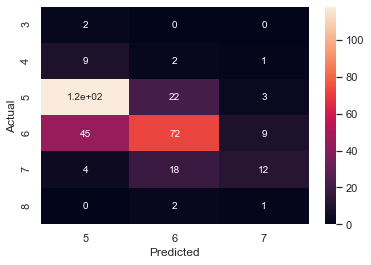

In [54]:
sns.heatmap(confusion_matrix3, annot=True)
plt.show()

In [55]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.66      0.83      0.74       143
           6       0.62      0.57      0.60       126
           7       0.46      0.35      0.40        34
           8       0.00      0.00      0.00         3

    accuracy                           0.63       320
   macro avg       0.29      0.29      0.29       320
weighted avg       0.59      0.63      0.61       320



C:\Users\Denys\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
accuracy_score(y_test, grid_predictions)

0.63125

Logistic One vs The Rest Regression

In [57]:
clf = LogisticRegression(multi_class='ovr')

In [58]:
model_log = clf.fit(X_train_scaled, y_train)

In [59]:
pred_log = model_log.predict(X_test_scaled)

In [60]:
print(confusion_matrix(y_test,pred_log))

[[  0   0   2   0   0   0]
 [  0   0   8   4   0   0]
 [  0   0 115  28   0   0]
 [  0   0  47  76   3   0]
 [  0   0   3  28   3   0]
 [  0   0   0   3   0   0]]


In [61]:
confusion_matrix4 = pd.crosstab(y_test, pred_log, rownames=['Actual'], colnames=['Predicted'])

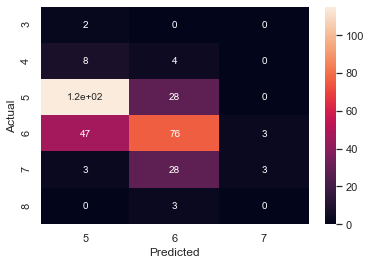

In [62]:
sns.heatmap(confusion_matrix4, annot=True)
plt.show()

In [63]:
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.66      0.80      0.72       143
           6       0.55      0.60      0.57       126
           7       0.50      0.09      0.15        34
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.28      0.25      0.24       320
weighted avg       0.56      0.61      0.56       320



C:\Users\Denys\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
accuracy_score(y_test, pred_log)

0.60625

K-Means Cluster Model

In [65]:
kmeans = KMeans(5)

Applying "elbow method" 

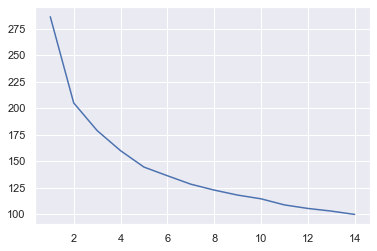

In [66]:
wcss = []

for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss)

In [67]:
y_train.head()

1183    5
1531    5
672     5
439     5
667     6
Name: quality, dtype: int64

In [68]:
comparison = y_train.copy().reset_index()

In [69]:
kmeans.fit(X_train_scaled)
comparison['predicted_clusters'] = kmeans.fit_predict(X_train_scaled)

In [70]:
comparison.drop('index', axis = 1, inplace = True)

In [71]:
comparison.head()

,quality,predicted_clusters
0,5,0
1,5,0
2,5,6
3,5,10
4,6,1


In [72]:
kmeans.fit(X_train_scaled)

KMeans(n_clusters=14)

In [73]:
comparison['predicted_clusters'] = kmeans.fit_predict(X_train_scaled)

In [74]:
comparison['quality'].value_counts()

5    538
6    512
7    165
4     41
8     15
3      8
Name: quality, dtype: int64

In [75]:
comparison['predicted_clusters'].value_counts()

3     229
12    132
6     125
4     110
11    103
7      97
1      91
10     86
9      78
0      69
2      63
8      41
5      35
13     20
Name: predicted_clusters, dtype: int64

PCA Projection to 2D for Kmeans

In [76]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [77]:
principalDf.head()

,principal component 1,principal component 2
0,-0.301637,-0.163701
1,-0.366364,-0.000065
2,0.056022,-0.416066
3,-0.131564,-0.103357
4,0.450040,-0.157993


In [78]:
y_train_new_index = y_train.copy().reset_index()

In [79]:
finalDf = pd.concat([principalDf, y_train_new_index['quality']], axis = 1)
finalDf.head()

,principal component 1,principal component 2,quality
0,-0.301637,-0.163701,5
1,-0.366364,-0.000065,5
2,0.056022,-0.416066,5
3,-0.131564,-0.103357,5
4,0.450040,-0.157993,6


Visualization of principal components

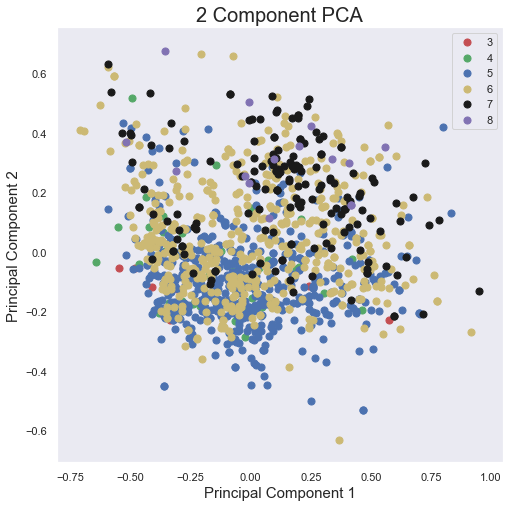

In [80]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [3,4,5,6,7,8]
colors = ['r', 'g', 'b', 'y', 'k', 'm']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Explained Variance Check

In [81]:
pca.explained_variance_ratio_

array([0.40598177, 0.17720364])

Together, the first two principal components contain 58.2% of the information.

PCA for 3 parameters

In [82]:
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(X_train_scaled)
principalDf3 = pd.DataFrame(data = principalComponents3, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [83]:
principalDf3.head()

,principal component 1,principal component 2,principal component 3
0,-0.301637,-0.163701,-0.032445
1,-0.366364,-0.000065,-0.054508
2,0.056022,-0.416066,0.224981
3,-0.131564,-0.103357,-0.135553
4,0.450040,-0.157993,-0.238810


In [84]:
finalDf3 = pd.concat([principalDf3, y_train_new_index['quality']], axis = 1)
finalDf3.head()

,principal component 1,principal component 2,principal component 3,quality
0,-0.301637,-0.163701,-0.032445,5
1,-0.366364,-0.000065,-0.054508,5
2,0.056022,-0.416066,0.224981,5
3,-0.131564,-0.103357,-0.135553,5
4,0.450040,-0.157993,-0.238810,6


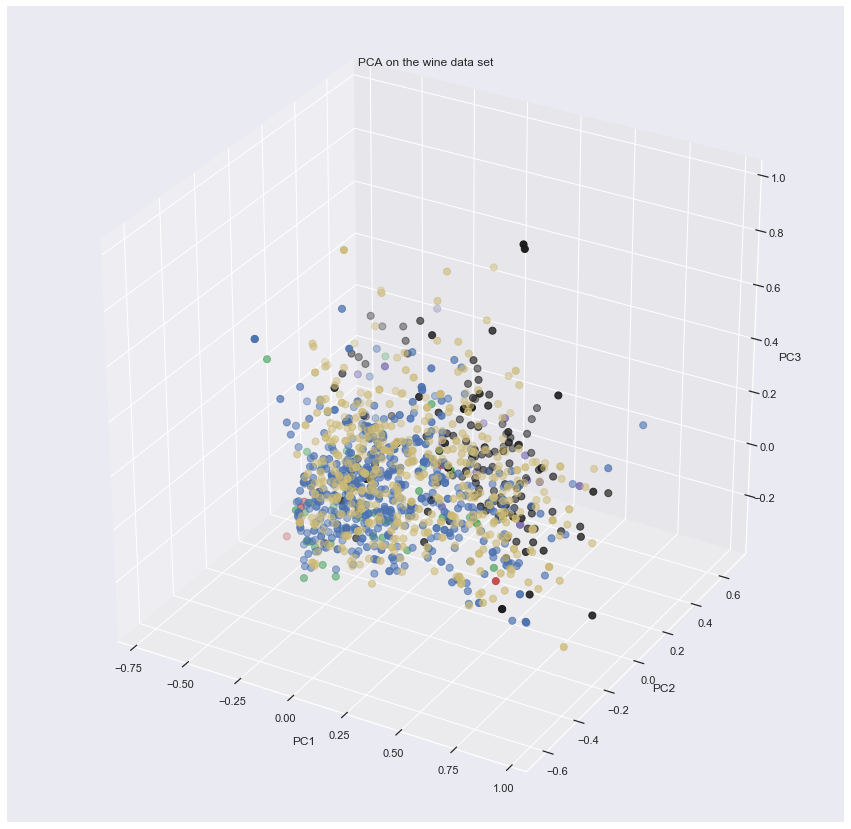

In [85]:
# Plot initialisation
fig1 = plt.figure(figsize = (15,15))
ax1 = fig1.add_subplot(111, projection='3d')
# label the axes
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")
ax1.set_title("PCA on the wine data set")

targets = [3,4,5,6,7,8]
colors = ['r', 'g', 'b', 'y', 'k', 'm']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf3['quality'] == target
    ax1.scatter(finalDf3.loc[indicesToKeep, 'principal component 1']
               , finalDf3.loc[indicesToKeep, 'principal component 2']
               , finalDf3.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()
#plt.show()


In [86]:
pca3.explained_variance_ratio_

array([0.40598177, 0.17720364, 0.13821719])

~ 72 % 

KMeans model with PCA data (3 parameters)

In [87]:
kmeans_pca = KMeans(5)

In [88]:
comparison_pca = y_train.copy().reset_index()

In [89]:
kmeans_pca.fit(principalDf3)
comparison_pca['predicted_clusters'] = kmeans_pca.fit_predict(principalDf3)

In [90]:
comparison_pca.drop('index', axis = 1, inplace = True)

In [91]:
comparison_pca.head()

,quality,predicted_clusters
0,5,3
1,5,3
2,5,0
3,5,3
4,6,1


In [92]:
comparison_pca['quality'].value_counts()

5    538
6    512
7    165
4     41
8     15
3      8
Name: quality, dtype: int64

In [93]:
comparison_pca['predicted_clusters'].value_counts()

3    393
0    282
1    247
4    205
2    152
Name: predicted_clusters, dtype: int64

Guassian Mixture Model

In [94]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6).fit(X_train_scaled)
labels = gmm.predict(X_train_scaled)

In [95]:
comparison_gmm = pd.DataFrame(data = labels, columns = ['predictions'])

In [96]:
#comparison_gmm.drop('targets', axis = 1, inplace = True)

In [97]:
comparison_gmm_targets = y_train.copy().reset_index()

In [98]:
comparison_gmm['targets'] = comparison_gmm_targets['quality']
comparison_gmm

,predictions,targets
0,3,5
1,5,5
2,3,5
3,3,5
4,1,6
...,...,...
1274,3,4
1275,5,5
1276,1,6
1277,5,5


In [99]:
comparison_gmm['predictions'].value_counts()

1    364
5    338
3    254
2    116
4    112
0     95
Name: predictions, dtype: int64

In [100]:
comparison_gmm['targets'].value_counts()

5    538
6    512
7    165
4     41
8     15
3      8
Name: targets, dtype: int64

In [101]:
# visualize the GMM

In [102]:
#productboard check

In [103]:
# GMM on PCA 2 with visualization

In [104]:
#from scipy.stats import multivariate_normal as mvn


#gmm = GaussianMixture(n_components=6, covariance_type='full').fit(principalDf)
#prediction_gmm = gmm.predict(principalDf)
#probs = gmm.predict_proba(principalDf)

#centers = np.zeros((3,2))
#for i in range(6):
#    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(principalDf)
#    centers[i, :] = principalDf[np.argmax(density)]

#plt.figure(figsize = (10,8))
#plt.scatter(principalDf[:, 0], principalDf[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

GMM on PCA 2 with visualization

In [105]:
#from sklearn.mixture import GaussianMixture

gmmPCA = GaussianMixture(n_components=6).fit(principalDf)
labelsPCA = gmmPCA.predict(principalDf)

In [106]:
#comparison_gmm = pd.DataFrame(data = labels, columns = ['predictions'])

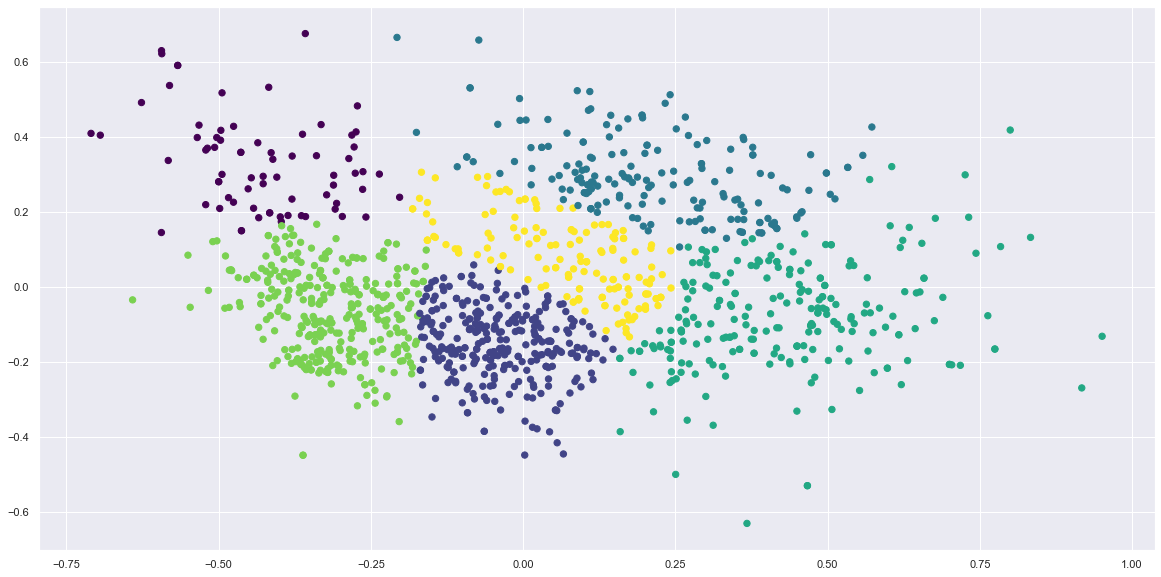

In [107]:
plt.figure(figsize = (20,10))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=labelsPCA, s=40, cmap='viridis');

In [108]:
comparison_gmm_pca = pd.DataFrame(data = labelsPCA, columns = ['predictions'])

In [109]:
comparison_gmm_pca['targets'] = comparison_gmm_targets['quality']
comparison_gmm_pca

,predictions,targets
0,4,5
1,4,5
2,1,5
3,1,5
4,3,6
...,...,...
1274,4,4
1275,1,5
1276,5,6
1277,1,5


In [110]:
comparison_gmm_pca['targets'].value_counts()

5    538
6    512
7    165
4     41
8     15
3      8
Name: targets, dtype: int64

In [111]:
comparison_gmm_pca['predictions'].value_counts()

4    338
1    305
3    232
2    177
5    155
0     72
Name: predictions, dtype: int64